#  Universidade Estadual do Cear - UECE 
## Programa de Pós-graduação em Ciência da Computação
## Otimização em Grafos 2021.1

# O problema da Fuga
### Domingos Bruno Sousa Santos
Um grid $n × n$ é um grafo não-direcionado que consiste de n linhas e n colunas de vértices, como mostrado na Figura. O vértice na linha i coluna j é denotado por $(i,j)$. Todos os vértices em um grid possuem exatamente 4 vizinhos, exceto pelos vértices nas bordas, isto é, os vértices
(i,j) em que $i = 1$, $i = n$, $j = 1$, ou $j = n$. Dados $m ≤ n^2$ pontos de partida $(x1, y1), (x2, y2), ... , (xm, ym)$ no grid, o problema da fuga consiste em decidir se existem ou não m caminhos disjuntos (isto é, sem vértices em comum) dos pontos de partida para quaisquer m pontos nas bordas. Por exemplo, o grid da figura (a) admite uma fuga, enquanto o da figura (b) não.

![title](fuga_prob.png)

* Antes de abordar o probema da fuga propriamente dito, considere uma definição de Rede de Fluxo Modificada (RFM), em que os vértices também podem ter capacidades. Isto é, o fluxo total que entra em um vértice está sujeito a esta capacidade. Mostre que determinar um fluxo máximo em uma RFM pode ser transformado em um problema de Fluxo Máximo em uma Rede de Fluxo de tamanho assintóticamente equivalente ao da RFM.

## Metodologia
   * 1) Modelagem do problema da fuga como um problema de fluxo máximo
   * 2) Construção do algoritmo para resolver o problema de fuga usando fluxo máximo
   * 3) Modifique o algoritmo e sua implementação para que não apenas responda se o gridadmite ou não uma fuga, mas para que forneça uma lista com os $m$ caminhos disjuntos.
   * 4) Análise do tempo de execução do algoritmo.


### 1) Modelagem do problema da fuga como um problema de fluxo máximo
A modelegem deste problema consistem em convertendo o problema da fuga em  caminho de Fluxo Máximo de. (Conversão de grafo não direcionado simples $G$ em gráfico direcionado para caminhos disjuntos de vértice em G  e aplicar o algoritmo de fluxo máximo)
   * 1) Adicione dois vértices artificiais: origem $s$ e destino $t$;
   * 2) Para cada vértice $u$ no conjunto de vértices iniciais (Pontos de partidas) para o problema de escape, é adicionado uma aresta de $s$ a $u_{in}$ com capacidade unitária de 1, de acordo como pode ser visto na imagem abaixo.

   ![title](fluxo_01.png)
   
   * 3) Duplicar cada vértice $v$ no grafo $G$ em dois vértices $v_{in}$ e $v_{out}$, exceto origem $s$ e destino $t$, 

   ![title](fluxo_02.png)
   * 4) Para cada vértice $v$, é adicionado uma aresta de capacidade unitária de 1 de $v_{in}$  para $v_{out}$.  

O fluxo máximo de $s-t$ é calculado usando o Algoritmo de Edmonds-Karp usando a biblioteca Python [Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html), com o método  $maximum\_flow$, onde o mesmo retorna o número máximo de caminhos disjuntos do vértice $s-t$, e uma lista com fluxo máximo dos pontos de partidas até os vértices das bordas do gride. Se Fluxo $s-t$ máximo for igual a quantidade de vértices de partidas $V$, então todos os vértices $V$ podem alcançar vértices de limite do grid usando caminhos disjuntos de vértices, com isso é possível ter solução e o grid admite uma fuga. 

## Implemeção 
Descreva e Implemente um Algoritmo eficiente para resolver o problema da fuga, e
analise o seu tempo de execução.
   * 1) Construção/montagem do grafo (Fluxo máximo)
      * Para criar o grafo modificado descrito anteriormente, inicialmente é adicionado os vértices de origem $s$ e destino $t$, em seguida é adicionado uma arestas com capacidade 1 do vértice de origem $s$ a todos os vértices de partida. Em Seguida é duplicado cada vértice $v$ no grafo $G$ em dois vértices $v_{in}$ e $v_{out}$, exceto origem $s$ e destino. Para cada vértice $v$, é adicionado uma aresta de capacidade unitária de 1 de $v_{in}$  para $v_{out}$. Com isso o grafo modificado é construído.
  
  Para realizar esse procedimento foi implementado a função $geraGrafo(len\_grid, coord\_part)$, onde a mesma tem como argumentos de entrada a tamanho do grid do problema $len\_grid$ (Lagura e altura) para a construção do grafo e  $coord\_part$ que trata-se de uma lista Python com as coordenadas dos pontos de partidas do grid. Essa função retorna o grafo modificado como um problema de fluxo máximo para assim ser usado em algoritmo que calcula esse fluxo. Para isso também é usado a biblioteca Python [Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html).
      
       
   * 2) Cálculo do fluxo com Algoritmo de Edmonds-Karp usando a biblioteca Python [Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html).
    * O custo de divisão dos vértices $V$ em dois vértices $V_{in}$ e $V_{out}$ é $O(V)$;
    * O custo do algoritmo Edmonds-Karp para o problema de fluxo máximo é $O(VE^2)$,  com o gráfico modificado para resolver o problema da fuga como uma modelagem de fluxo máximo o custo do algoritmo Edmonds-Karp fica: $O(V’E’^2) = O(2V(E+V)^2)$
    * A complexidade total do problema da Fuga é a complexidade do grafo modificado mais o custo do algoritmo de fluxo máximo: $= O(V) + O(2V(E+V)^2) = O(2V(E+V)^2)$

   
   * 3) Fornecer uma lista com os $m$ caminhos disjuntos, caso o grid permita fuga.
       * Como mencionado anteriormente, após a modelagem e a construção do grafo modificado como um problema de fluxo máximo é usado a função   $networkx.maximum\_flow(grafo\_01, "S", "T")$ da biblioteca net, essa função usa do algoritmo Edmonds-Karp por padrão, onde é fornecido três argumento de entrada: o grafo modificado ($grafo\_01$), e os dois pontos, origem (‘S’) e destino (‘T’),  a mesma retorna o valor do fluxo máximo e um lista com os caminhos entre S e T e os fluxos entre os vértices do grafo.
       
       * É implementado a função $pathFlow(flow\_dic, cord\_part, len\_grid)$, usado para fornecer uma lista com os  $m$  caminhos disjuntos, caso o grid permita fuga, essa função tem três argumentos de entrada: $flow\_dic$ que consiste na lista fornecida na saída da função $networkx.maximum\_flow(grafo\_01, "S", "T")$, $cord\_part$, trata-se dos de uma lista dos  pontos de partidas da fuga e $len\_grid$ consiste no tamanho do grid (altura e largura). Essa função pega todos os caminhos dos pontos de fuga até as bordas do grid onde o fluxo é igual a 1, retornando uma lista com os $m$ caminhos disjuntos, caso o grid permita fuga.


## Detalhes do ambiente de implementação e execulção do código
* Para essa imple foi usado a linguagem de programação Python na versão 3.8, as bibliotecas [Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html) e [Matiplotlib](https://matplotlib.org/) nas versões 2.5 e 3.3 respectivamente.

* Abaixo está todo o código desenvolvido para resolver o problema da Fuga, com o exemplo da figura (a) da imagem de exemplo, esse trabalho é constituído de um PDF com as explicações, um arquivo executável Python e um Jupyter Notebook Python ambos contendo todo o código e um exemplo de aplicação.

In [2]:
import networkx 
import matplotlib.pyplot as plt
from networkx.algorithms.flow import edmonds_karp

In [3]:
# Função para gerar o grafo modificado como proplema de fluxo máximo
def geraGrafo(len_grid, coord_part):

    grafoT = networkx.DiGraph()

    nx = len_grid # Largura do grid
    ny = len_grid # Altura do grid

    # Ordenando as coordenadas de partidas
    coord_part = sorted(coord_part)
    
    #adicionand os vértices S e T
    grafoT.add_node('S')
    grafoT.add_node('T')

    #criando os vértices do grid já duplicados e com as arestas Vin-Vout
    for i in range(1, nx + 1):
        for j in range(1, ny + 1):
            grafoT.add_node(str(i) + '-' + str(j) + '-IN')
            grafoT.add_node(str(i) + '-' + str(j) + '-OUT')
            grafoT.add_edge(str(i) + '-' + str(j) + '-IN', str(i) + '-' + str(j) + '-OUT', capacity=1.0)

            
    
    #arestas de origem S para pontos de fuga
    for cord in coord_part:
        grafoT.add_edge('S', str(cord[0])+'-'+str(cord[1])+'-IN', capacity=1.0)
        

    #Demais arestas do grid
    for i in range(1, nx + 1):
        for j in range(1, ny + 1):
            if( i > 1 and i <= nx and j > 1 and j <= ny):
                grafoT.add_edge(str(i - 1) + '-' + str(j) + '-OUT', str(i) + '-' + str(j) + '-IN', capacity=1.0)
                grafoT.add_edge(str(i) + '-' + str(j) + '-OUT', str(i - 1) + '-' + str(j) + '-IN', capacity=1.0)
                grafoT.add_edge(str(i) + '-' + str(j - 1) + '-OUT', str(i) + '-' + str(j) + '-IN', capacity=1.0)
                grafoT.add_edge(str(i) + '-' + str(j) + '-OUT', str(i) + '-' + str(j - 1) + '-IN', capacity=1.0)

    for i in range(1, nx):
        grafoT.add_edge(str(1) + '-' + str(i) + '-OUT', str(1) + '-' + str(i + 1) + '-IN', capacity=1.0)
        grafoT.add_edge(str(1) + '-' + str(i + 1) + '-OUT', str(1) + '-' + str(i) + '-IN', capacity=1.0)
        grafoT.add_edge(str(i) + '-' + str(1) + '-OUT', str(i + 1) + '-' + str(1) + '-IN', capacity=1.0)
        grafoT.add_edge(str(i + 1) + '-' + str(1) + '-OUT', str(i) + '-' + str(1) + '-IN', capacity=1.0)


    #arestas das bordas para T
    for i in range(1, nx + 1):
        grafoT.add_edge(str(1) + '-' + str(i) + '-OUT', 'T', capacity=1.0)
        grafoT.add_edge(str(i) + '-' + str(1) + '-OUT', 'T', capacity=1.0)
        grafoT.add_edge(str(nx) + '-' + str(i) + '-OUT', 'T', capacity=1.0)
        grafoT.add_edge(str(i) + '-' + str(nx) + '-OUT', 'T', capacity=1.0)

    print("Nós:", grafoT.nodes)
    print("")
    print("Arestas: ", grafoT.edges)

    pos = networkx.spring_layout(grafoT)
    networkx.draw_networkx_nodes(grafoT, pos)
    networkx.draw_networkx_labels(grafoT, pos)
    networkx.draw_networkx_edges(grafoT, pos, edge_color='r', arrows = True)
    plt.show()
    
    return grafoT

In [30]:
# Função para  fornecer uma lista com os  𝑚  caminhos disjuntos, caso o grid permita fura
def pathFlow(flow_dic, cord_part, len_grid):
    
    list_path_flow = []
    
    for coord in cord_part:
        path_flow = []
        path_flow.append(coord) # Ponto de partida
        # Verificar se a coordenada de escape ta na borda do gride
        if coord[0] == 1 or coord[1] == 1 or coord[0] == len_grid or coord[1] == len_grid:
            path_flow.append(coord)
        
        else:
            pont_part = str(coord[0])+'-'+str(coord[1])+'-OUT'
            aux = True
            out_flow = list(flow_dic[pont_part])
            # Pegando as rotas de saida de cada ponto de partida
            while aux:
                for i in  out_flow:
                    if int(flow_dic[pont_part][i]) == 1:
                        b = i.split('-')
                        c = [int(b[0]), int(b[1])]
                        path_flow.append(c)
                # Atualizando as chaves 
                out_flow = list(flow_dic[str(c[0])+'-'+str(c[1])+'-OUT'])
                pont_part = str(c[0])+'-'+str(c[1])+'-OUT'
                if c[0] == 1 or c[1] == 1 or c[0] == len_grid or c[1] == len_grid:
                    aux = False
        list_path_flow.append(path_flow)
    return list_path_flow

Nós: ['S', 'T', '1-1-IN', '1-1-OUT', '1-2-IN', '1-2-OUT', '1-3-IN', '1-3-OUT', '1-4-IN', '1-4-OUT', '1-5-IN', '1-5-OUT', '1-6-IN', '1-6-OUT', '2-1-IN', '2-1-OUT', '2-2-IN', '2-2-OUT', '2-3-IN', '2-3-OUT', '2-4-IN', '2-4-OUT', '2-5-IN', '2-5-OUT', '2-6-IN', '2-6-OUT', '3-1-IN', '3-1-OUT', '3-2-IN', '3-2-OUT', '3-3-IN', '3-3-OUT', '3-4-IN', '3-4-OUT', '3-5-IN', '3-5-OUT', '3-6-IN', '3-6-OUT', '4-1-IN', '4-1-OUT', '4-2-IN', '4-2-OUT', '4-3-IN', '4-3-OUT', '4-4-IN', '4-4-OUT', '4-5-IN', '4-5-OUT', '4-6-IN', '4-6-OUT', '5-1-IN', '5-1-OUT', '5-2-IN', '5-2-OUT', '5-3-IN', '5-3-OUT', '5-4-IN', '5-4-OUT', '5-5-IN', '5-5-OUT', '5-6-IN', '5-6-OUT', '6-1-IN', '6-1-OUT', '6-2-IN', '6-2-OUT', '6-3-IN', '6-3-OUT', '6-4-IN', '6-4-OUT', '6-5-IN', '6-5-OUT', '6-6-IN', '6-6-OUT']

Arestas:  [('S', '2-2-IN'), ('S', '2-4-IN'), ('S', '2-6-IN'), ('S', '3-1-IN'), ('S', '3-2-IN'), ('S', '3-4-IN'), ('S', '3-6-IN'), ('S', '4-2-IN'), ('S', '4-4-IN'), ('S', '4-6-IN'), ('1-1-IN', '1-1-OUT'), ('1-1-OUT', '1-2-IN'), 

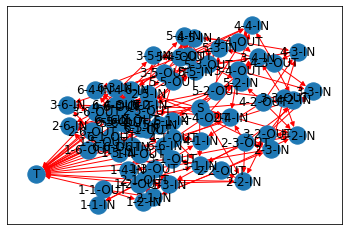

In [32]:
# Exemplo da figura (a) da imagem de exemplo do problema de Fuga


# Criando o grafo modificado
# Coordenadas de partidas
cord_part = [ [2, 2], [2, 4], [2, 6], [3, 1], [3, 2], [3, 4], [3, 6], [4, 2], [4, 4], [4, 6] ]
len_grid = 6  # Tamannho do grid (len_grid x len_grid)
grafo_01 = geraGrafo(len_grid, cord_part) # Gerando o grafo de fluxo

In [33]:
# Calculando o Fluxo maximo
flow_value, flow_dict = networkx.maximum_flow(grafo_01, "S", "T")
print(flow_value)
print(flow_dict)

10.0
{'S': {'2-2-IN': 1.0, '2-4-IN': 1.0, '2-6-IN': 1.0, '3-1-IN': 1.0, '3-2-IN': 1.0, '3-4-IN': 1.0, '3-6-IN': 1.0, '4-2-IN': 1.0, '4-4-IN': 1.0, '4-6-IN': 1.0}, 'T': {}, '1-1-IN': {'1-1-OUT': 0}, '1-1-OUT': {'1-2-IN': 0, '2-1-IN': 0, 'T': 0}, '1-2-IN': {'1-2-OUT': 1.0}, '1-2-OUT': {'2-2-IN': 0, '1-1-IN': 0, '1-3-IN': 0, 'T': 1.0}, '1-3-IN': {'1-3-OUT': 1.0}, '1-3-OUT': {'2-3-IN': 0, '1-2-IN': 0, '1-4-IN': 0, 'T': 1.0}, '1-4-IN': {'1-4-OUT': 1.0}, '1-4-OUT': {'2-4-IN': 0, '1-3-IN': 0, '1-5-IN': 0, 'T': 1.0}, '1-5-IN': {'1-5-OUT': 1.0}, '1-5-OUT': {'2-5-IN': 0, '1-4-IN': 0, '1-6-IN': 0, 'T': 1.0}, '1-6-IN': {'1-6-OUT': 0}, '1-6-OUT': {'2-6-IN': 0, '1-5-IN': 0, 'T': 0}, '2-1-IN': {'2-1-OUT': 0}, '2-1-OUT': {'2-2-IN': 0, '1-1-IN': 0, '3-1-IN': 0, 'T': 0}, '2-2-IN': {'2-2-OUT': 1.0}, '2-2-OUT': {'1-2-IN': 1.0, '2-1-IN': 0, '2-3-IN': 0, '3-2-IN': 0}, '2-3-IN': {'2-3-OUT': 1.0}, '2-3-OUT': {'1-3-IN': 1.0, '2-2-IN': 0, '2-4-IN': 0, '3-3-IN': 0}, '2-4-IN': {'2-4-OUT': 1.0}, '2-4-OUT': {'1-4-I

In [34]:
# Se o fluxo maximo tiver a mesma quantiade que os pontos de partidas (Tem solução)
if int(flow_value) == len(cord_part):
    caminho = pathFlow(flow_dict, cord_part, len_grid)
    caminho = sorted(caminho)
    for cam in caminho:
        print(cam)
else:
    print("Não tem solução")


[[2, 2], [1, 2]]
[[2, 4], [1, 4]]
[[2, 6], [2, 6]]
[[3, 1], [3, 1]]
[[3, 2], [3, 3], [2, 3], [1, 3]]
[[3, 4], [3, 5], [2, 5], [1, 5]]
[[3, 6], [3, 6]]
[[4, 2], [4, 1]]
[[4, 4], [5, 4], [6, 4]]
[[4, 6], [4, 6]]
